# Принадлежность точки выпуклому многоугольнику

Во многих задачах требуется локализовать точку в многоугольнике. Здесь описан алгоритм, с помощью которого можно локализовать точку в многоугольнике, если известно, что он выпуклый.

## Описание алгоритма
Нам даются точки ($a_i$) - вершины многоугольника в порядке обхода и искомая точка ($p$). Пусть у многоугольника $n$ вершин. У выпуклого многоугольника есть свойство: если из любой точки $a_i$ рассмотреть поворот до других точек ($a_j$): ($a_j$,$a_i$,$p$) он будет монотонным. 
* Рассмотрим первую (a_0) точку в списке вершин.
* Проверим, что где точка $p$ находится относительно от прилежащих к первой вершине ребер ([$a_0,a_1$] или [$a_0,a_1$] и [$a_n,a_0$]).
* Если точка справа от ребра [$a_0,a_1$] или справа от ребра [$a_n,a_0$] (поворот меньше нуля), то точка находится вне многоугольника.
* Если точка слева от ребра [$a_0,a_1$] и от ребра [$a_n,a_0$] (поворот больше нуля), то будем искать бин-поиском между какими диагоналями лежит точка, т. е. найдем такое i, что поворот ($a_{i}$, $a_{0}$, $p$) и ($a_{i+1}$, $a_{0}$, $p$) различный.
*  Проверяем, точка справа или слева от ребра ($a_i$, $a_{i+1}$). Если справа, то внутри, иначе снаружи.

## Пример использования
Давайте попробуем быстро локализовать точку на этом примере:
<img src="images/example.png" />
1) точка будет точно находиться вне многоугольника, если она будет вне угла с вершинами $a_1 a_0 a_8$:
* точка будет находиться внутри угла $a_i a_0 a_j$, тогда и только тогда, предикаты поворотов будет одинаковым для точек $a_i a_0 a_j$ и $a_i a_0 p$ и для точек $a_j a_0 a_i$, $a_j a_0 p$ (очевидно)
* для выпуклого многоугольника достаточно, чтобы $i<j$ и повороты $a_i a_0 p$, $a_0 a_j p$ были правыми, так как в выпуклом многоульнике все вершины задаются против часовой стрелки.

2) В нашем случае точка внутри угла $a_1 a_0 a_8$, то давайте найдем внутри какого маленького угла ($a_{i} a_0 a_{i+1}$) находится точка. В этом нам поможет бин-поиск: 
* Если точка находится внутри угла $a_4 a_0 a_8$, то она не может находиться в угле $a_1 a_0 a_4$ и значит не может находиться ни в одном маленьком угле, который есть внутри угла $a_1 a_0 a_4$. 
* Аналогичными действиями можно отсекать на каждом шаге по половине углов, в которых может быть точка.
* На следующем шаге определяется, что точка находится в угле $a_6 a_0 a_8$, а на последнем в угле $a_6 a_0 a_7$

3) Когда мы нашли маленький угол $a_{i} a_0 a_{i+1}$, в котором лежит точка (в данном случае $i=6$), то остается проверить, что точка лежит ли внутри триугольника $a_{i} a_0 a_{i+1}$, а это просто, ибо надо проверить, что точка справа от ребра $a_i a_{i+1}$, так как известно, что точка внутри угла $a_i a_0 a_{i+1}$. В нашем случае точка находится слева от ребра $a_6 a_7$ и значит находится вне многоугольника (что является правдой). Ура.



## Время работы
Время работы бин-поиска $O(log(n))$, так как на каждом шагу бин-поиска делается $O(1)$ поворотов. Значит время работы алгоритма $O(log(n))$.

In [1]:
import solutions 

## Упражнение

In [2]:
#def checkTriangle(points, point):#надо написать функцию, которая проверяет принадлежность точки треугольнику
    #points - массив с вершинами треугольника. Каждая вершина задается следующим образом: [x,y], где x и y - координаты вершины
    #point = [x, y], где x и y - координаты точки p
    #возвращает True, если точка p лежит внутри треугольника
    #возвращает False, если точка р лежит вне треугольника или на границе
#    return True

checkTriangle = solutions.checkTriangle

Проверим корректность функции:

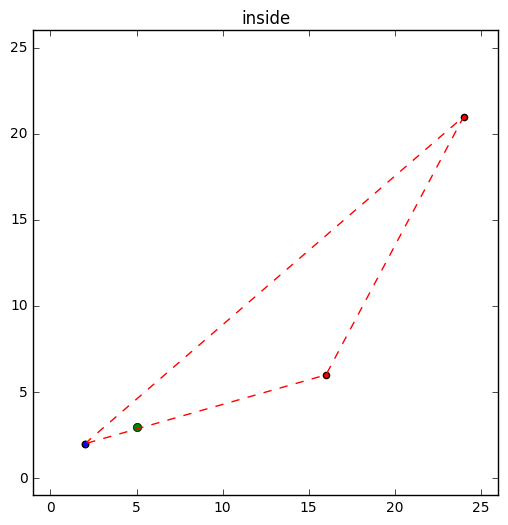

In [7]:
test=[[[2, 2], [24, 21], [16, 6]],
     [5, 3]]
    
#solutions.testTriangle(checkTriangle)
solutions.showTest(test,checkTriangle) 

In [10]:
#def check(points,point): #надо написать функцию, без использования библиотек, чтобы эта функция работала корректно
    #предыдущее упражнение должно помочь
    #points - массив вершин в порядке обхода, каждая вершина задается следующим образом: [x, y], где x и y - координаты вершины.
    #point = [x, y], где x и y - координаты точки p
    #возвращает 'True', если точка point лежит внутри многоугольника, который задан своими вершинами в порядке обхода в points
    #возвращает 'False' иначе
    #писать отдельно функцию поворота не надо, ибо она уже написана (solutions.orientation)
    #гарантируется, что многоугольник будет выпуклым
    
#    return True
    
check = solutions.check

Давайте проверим, что написанная функция правильная:
если какой то тест не будет пройден, то будет картинка, которая покажет этот тест и покажет синим цветом какая вершина нулевая 

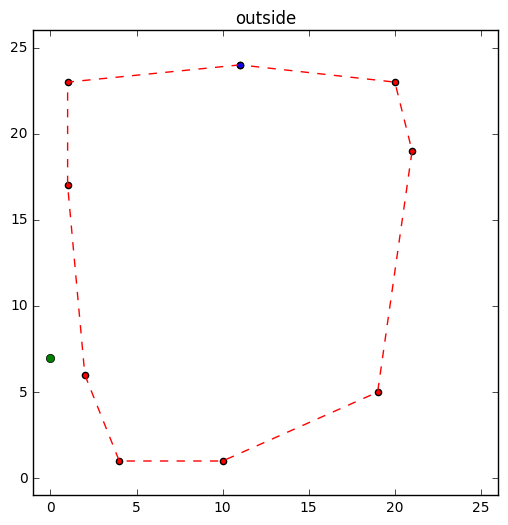

In [11]:
test=[[[11, 24], [1, 23], [1, 17], [2, 6], [4, 1], [10, 1], [19, 5], [21, 19], [20, 23]],
     [0, 7]]

solutions.test(check)
solutions.showTest(test,check)